In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,matthews_corrcoef


import xgboost as xgb

In [2]:
df = pd.read_csv('../Feature Engineering/EPL_Final_cleaned_features_v2.csv')
df.head(5)

,Temperature,Humidity,WindDirection,Precipitation,WindSpeed,Home_Prv_FTHG,Home_Prv_HS,Home_Prv_HST,Home_Prv_HF,Home_Prv_HC,...,WeatherCode_Clear,WeatherCode_Clouds,WeatherCode_Drizzle,WeatherCode_Fog,WeatherCode_Haze,WeatherCode_Mist,WeatherCode_Rain,WeatherCode_Snow,Time_of_Day_Afternoon,Time_of_Day_Evening
0,1.589044,-0.947690,0.173322,-0.362486,1.677221,0.561811,0.043716,-0.045927,-0.171534,0.002643,...,0,1,0,0,0,0,0,0,1,0
1,1.917548,-0.815443,0.500378,-0.362486,1.280300,1.363757,2.156421,1.555162,-0.443552,1.065042,...,1,0,0,0,0,0,0,0,1,0
2,1.400248,-0.418701,0.816532,-0.362486,0.273563,0.561811,-0.340412,-0.846471,-1.259605,-0.351490,...,0,1,0,0,0,0,0,0,1,0
3,1.811823,-0.683196,0.500378,-0.362486,0.558625,0.561811,-1.300732,-0.446199,2.004609,-1.413890,...,0,0,0,0,0,0,1,0,1,0
4,2.011946,-0.881566,0.500378,-0.362486,0.558625,1.363757,0.811972,2.355707,0.100484,0.710909,...,1,0,0,0,0,0,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature                1072 non-null   float64
 1   Humidity                   1072 non-null   float64
 2   WindDirection              1072 non-null   float64
 3   Precipitation              1072 non-null   float64
 4   WindSpeed                  1072 non-null   float64
 5   Home_Prv_FTHG              1072 non-null   float64
 6   Home_Prv_HS                1072 non-null   float64
 7   Home_Prv_HST               1072 non-null   float64
 8   Home_Prv_HF                1072 non-null   float64
 9   Home_Prv_HC                1072 non-null   float64
 10  Home_Prv_HY                1072 non-null   float64
 11  Home_Prv_HR                1072 non-null   float64
 12  Away_Prv_FTAG              1072 non-null   float64
 13  Away_Prv_AS                1072 non-null   float

In [61]:
train_data = df[df['season'].isin(['2019-2020', '2020-2021'])]
test_data = df[df['season'] == '2021-2022']

In [62]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722 entries, 0 to 721
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature                722 non-null    float64
 1   Humidity                   722 non-null    float64
 2   WindDirection              722 non-null    float64
 3   Precipitation              722 non-null    float64
 4   WindSpeed                  722 non-null    float64
 5   Home_Prv_FTHG              722 non-null    float64
 6   Home_Prv_HS                722 non-null    float64
 7   Home_Prv_HST               722 non-null    float64
 8   Home_Prv_HF                722 non-null    float64
 9   Home_Prv_HC                722 non-null    float64
 10  Home_Prv_HY                722 non-null    float64
 11  Home_Prv_HR                722 non-null    float64
 12  Away_Prv_FTAG              722 non-null    float64
 13  Away_Prv_AS                722 non-null    float64

### Model with Weather Data:

In [82]:
# Splitting into features and target variable
X_train = train_data.drop(columns=['FTR','Date', 'Time', 'season','HomeTeam','AwayTeam'])
y_train = train_data['FTR']
X_test = test_data.drop(columns=['FTR','Date', 'Time', 'season','HomeTeam','AwayTeam'])
y_test = test_data['FTR']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((722, 49), (722,), (350, 49), (350,))

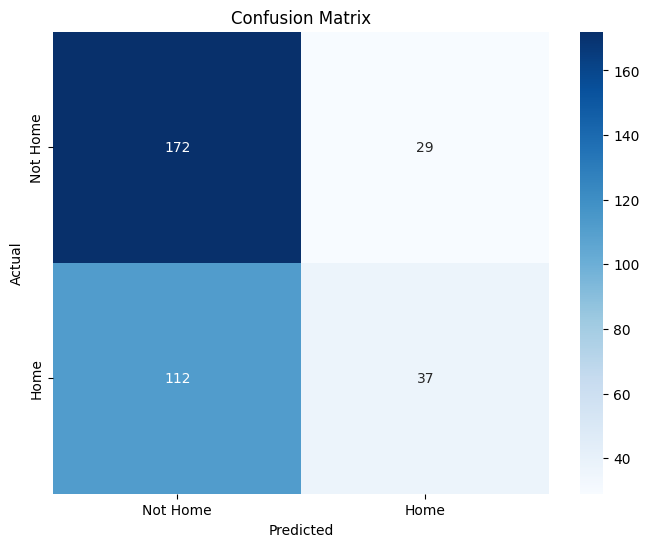

{'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 100}
MCC: 0.13151495730012688
accuracy: 0.5971428571428572
              precision    recall  f1-score   support

           0       0.61      0.86      0.71       201
           1       0.56      0.25      0.34       149

    accuracy                           0.60       350
   macro avg       0.58      0.55      0.53       350
weighted avg       0.59      0.60      0.55       350



In [83]:
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': range(3,8),
    'min_samples_split': range(2,9),
    'min_samples_leaf': range(2,9)
    # 'bootstrap': [True, False]
}

# Using GridSearchCV to find the best hyperparameters (with weather data)
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=4, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters from GridSearch
best_params = grid_search_rf.best_params_

# Building the Random Forest model with the best parameters
model_rf = RandomForestClassifier(**best_params, random_state=42)
model_rf.fit(X_train, y_train)

# Predicting on the test data
y_pred = model_rf.predict(X_test)

# Calculate accuracy and classification report
mcc = matthews_corrcoef(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Home', 'Home'], yticklabels=['Not Home', 'Home'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(best_params)
print(f'MCC: {mcc}')
print(f'accuracy: {accuracy}')
print(classification_report_output)

In [84]:
pd.DataFrame(y_pred,columns=['LR_y_pred']).to_csv('2.RF_y_pred_with_weather.csv')

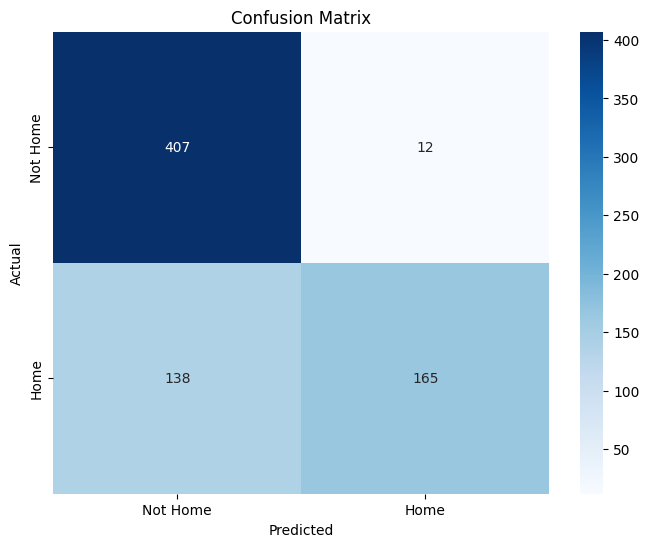

{'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 100}
MCC: 0.591863365650397
accuracy: 0.7922437673130194
              precision    recall  f1-score   support

           0       0.75      0.97      0.84       419
           1       0.93      0.54      0.69       303

    accuracy                           0.79       722
   macro avg       0.84      0.76      0.77       722
weighted avg       0.82      0.79      0.78       722



In [85]:
# Predicting on the test data
y_train_pred = model_rf.predict(X_train)

# Calculate accuracy and classification report
mcc = matthews_corrcoef(y_train, y_train_pred)
accuracy = accuracy_score(y_train, y_train_pred)
classification_report_output = classification_report(y_train, y_train_pred)

cm = confusion_matrix(y_train, y_train_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Home', 'Home'], yticklabels=['Not Home', 'Home'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(best_params)
print(f'MCC: {mcc}')
print(f'accuracy: {accuracy}')
print(classification_report_output)

### Model without Weather Data:

In [86]:
# Splitting into features and target variable
X_train = train_data.drop(columns=['FTR','Date', 'Time', 'season','HomeTeam','AwayTeam','Temperature', 'Humidity', 'WindDirection', 'Precipitation', 'WindSpeed', 
                                   'WeatherCode_Clear', 'WeatherCode_Clouds', 'WeatherCode_Drizzle', 'WeatherCode_Fog', 'WeatherCode_Haze', 'WeatherCode_Mist', 'WeatherCode_Rain', 'WeatherCode_Snow'])
y_train = train_data['FTR']
X_test = test_data.drop(columns=['FTR','Date', 'Time', 'season','HomeTeam','AwayTeam','Temperature', 'Humidity', 'WindDirection', 'Precipitation', 'WindSpeed', 
                                   'WeatherCode_Clear', 'WeatherCode_Clouds', 'WeatherCode_Drizzle', 'WeatherCode_Fog', 'WeatherCode_Haze', 'WeatherCode_Mist', 'WeatherCode_Rain', 'WeatherCode_Snow'])
y_test = test_data['FTR']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((722, 36), (722,), (350, 36), (350,))

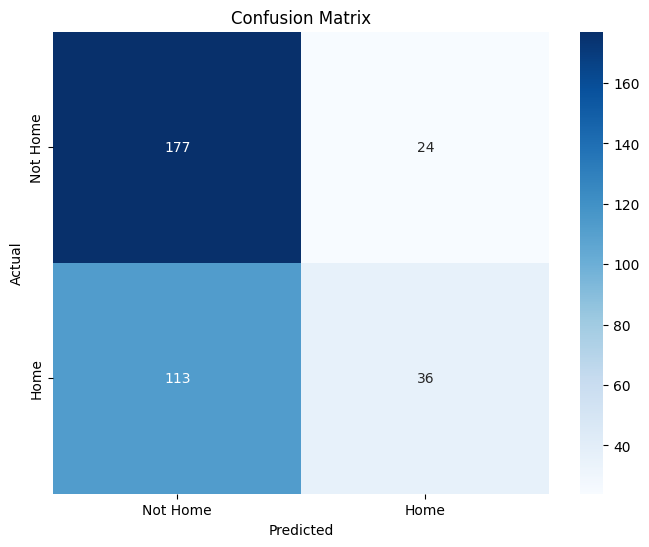

{'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 100}
MCC: 0.16033018671613394
accuracy: 0.6085714285714285
              precision    recall  f1-score   support

           0       0.61      0.88      0.72       201
           1       0.60      0.24      0.34       149

    accuracy                           0.61       350
   macro avg       0.61      0.56      0.53       350
weighted avg       0.61      0.61      0.56       350



In [87]:
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': range(3,8),
    'min_samples_split': range(2,9),
    'min_samples_leaf': range(2,9)
    # 'bootstrap': [True, False]
}

# Using GridSearchCV to find the best hyperparameters (with weather data)
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=4, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters from GridSearch
best_params = grid_search_rf.best_params_

# Building the Random Forest model with the best parameters
model_rf = RandomForestClassifier(**best_params, random_state=42)
model_rf.fit(X_train, y_train)

# Predicting on the test data
y_pred = model_rf.predict(X_test)

# Calculate accuracy and classification report
mcc = matthews_corrcoef(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Home', 'Home'], yticklabels=['Not Home', 'Home'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(best_params)
print(f'MCC: {mcc}')
print(f'accuracy: {accuracy}')
print(classification_report_output)

In [88]:
pd.DataFrame(y_pred,columns=['LR_y_pred']).to_csv('2.RF_y_pred_without_weather.csv')

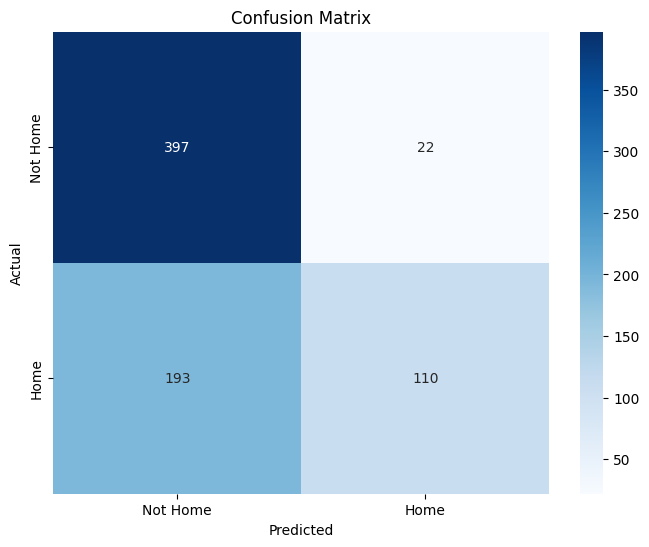

{'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 100}
MCC: 0.39647826935895447
accuracy: 0.7022160664819944
              precision    recall  f1-score   support

           0       0.67      0.95      0.79       419
           1       0.83      0.36      0.51       303

    accuracy                           0.70       722
   macro avg       0.75      0.66      0.65       722
weighted avg       0.74      0.70      0.67       722



In [89]:
# Predicting on the test data
y_train_pred = model_rf.predict(X_train)

# Calculate accuracy and classification report
mcc = matthews_corrcoef(y_train, y_train_pred)
accuracy = accuracy_score(y_train, y_train_pred)
classification_report_output = classification_report(y_train, y_train_pred)

cm = confusion_matrix(y_train, y_train_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Home', 'Home'], yticklabels=['Not Home', 'Home'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(best_params)
print(f'MCC: {mcc}')
print(f'accuracy: {accuracy}')
print(classification_report_output)